In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier

In [146]:
database = pd.read_csv('database.csv')

In [147]:
print(database['stdip'].mean())

46.57634567976242


In [148]:
database = database.sort_values(by='sip')
X_train, X_test, y_train, y_test = train_test_split(
    database.drop('target', axis=1),
    database['target'],
    train_size=0.8,
    test_size=0.2,
    random_state=27,
    stratify=database['target']
)

In [149]:
print(X_train['stdip'].mean())

46.5793851124956


In [150]:
for key in X_train.keys():
    Min = min(X_train[key])
    Max = max(X_train[key])
    for key_i in X_train[key].keys():
        X_train[key][key_i]=(X_train[key][key_i]-Min)/(Max-Min)
    for key_i in X_test[key].keys():
        X_test[key][key_i]=(X_test[key][key_i]-Min)/(Max-Min)

/tmp/ipykernel_1307/4022038296.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train[key][key_i]=(X_train[key][key_i]-Min)/(Max-Min)
/tmp/ipykernel_1307/4022038296.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in p

In [151]:
print(X_train['ekc'].mean())

0.3040735168584504


0.8606271777003485


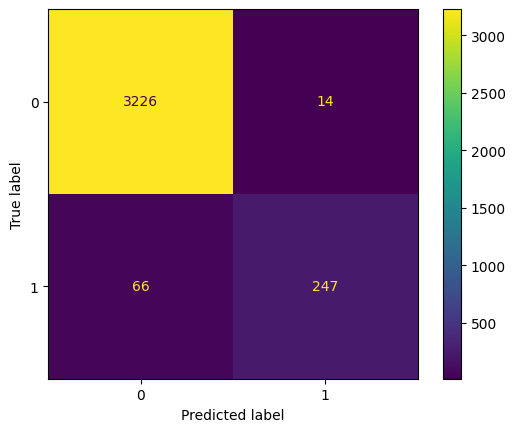

In [152]:
model = LogisticRegression(random_state=27)
model.fit(X_train, y_train)
ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(X_test))).plot()
print(f1_score(y_test, model.predict(X_test)))

0.891846921797005


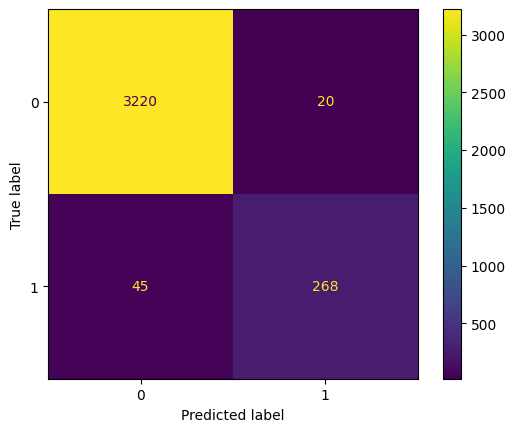

In [153]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(X_test))).plot()
print(f1_score(y_test, model.predict(X_test)))